LEVEL 3 (ADVANCED) TASK 1 TIME SERIES FORECASTING

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


STOCK MARKET DATASET

Time series forecasting is a technique used to predict future values of a time series data based on its past patterns and trends. In the context of a stock market dataset with features like Open, Close, High, Low, Volume, Date, and Company, time series forecasting aims to forecast future stock prices or volumes. The goal is to analyze historical data and identify patterns, such as trends, seasonality, or correlations, to make informed predictions about future market behavior. For instance, forecasting the future closing price of a stock based on its past closing prices, trading volumes, and other relevant features. This can help investors, traders, and financial analysts make data-driven decisions and anticipate potential market movements

In [4]:
stock_market = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/2) Stock Prices Data Set.csv")
stock_market

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916



DATA PREPARATION FOR MODEL DEVELOPMENT

In [5]:
stock_market.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [6]:
print("No Duplicates Found!" if stock_market.shape[0] == stock_market.drop_duplicates().shape[0]  else stock_market.drop_duplicates()) 

No Duplicates Found!


In [7]:
stock_df = stock_market[stock_market["symbol"] == "AAPL"].copy()
stock_market

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [8]:
stock_market = stock_market.dropna()
stock_market.isna().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
stock_df["date"] = pd.to_datetime(stock_df["date"])
stock_df = stock_df.sort_values("date")
stock_df.set_index("date", inplace=True)
stock_market

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


OUTLIER DETECTION

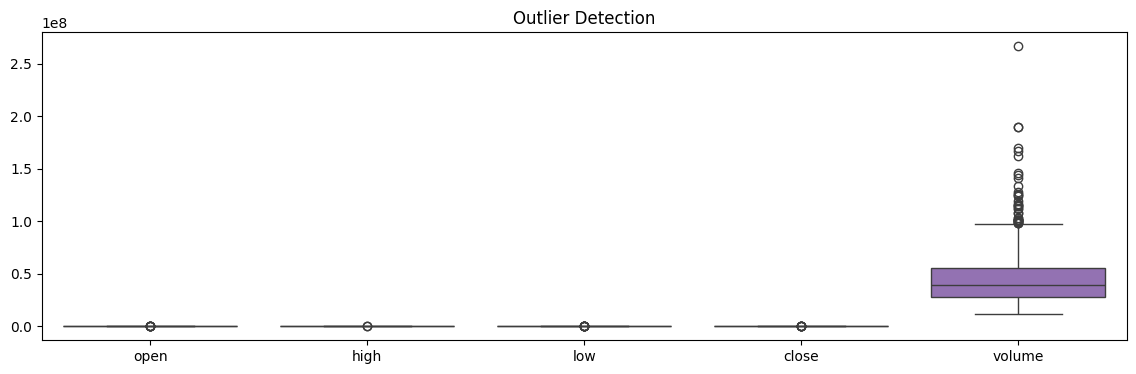

In [10]:
plt.figure(figsize=(14, 4))
numerical = stock_df.select_dtypes(include='number')
from seaborn import boxplot; boxplot(data=numerical)
plt.title("Outlier Detection")
plt.show();


ANALYZING TRENDS AND PATTERNS OF AAPL MARKET

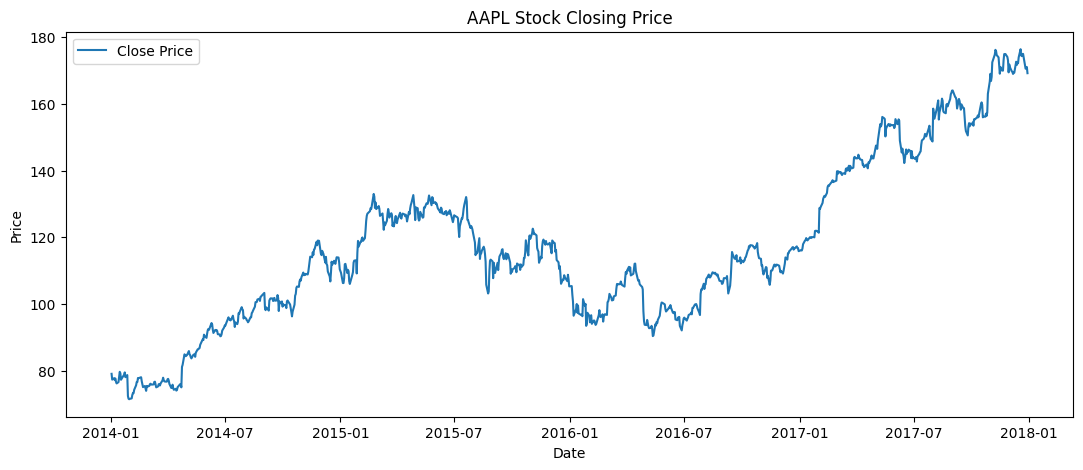

In [11]:
plt.figure(figsize=(13, 5))
plt.plot(stock_df["close"], label="Close Price")
plt.title("AAPL Stock Closing Price")
plt.xlabel("Date"); plt.ylabel("Price"); plt.legend()
plt.show();

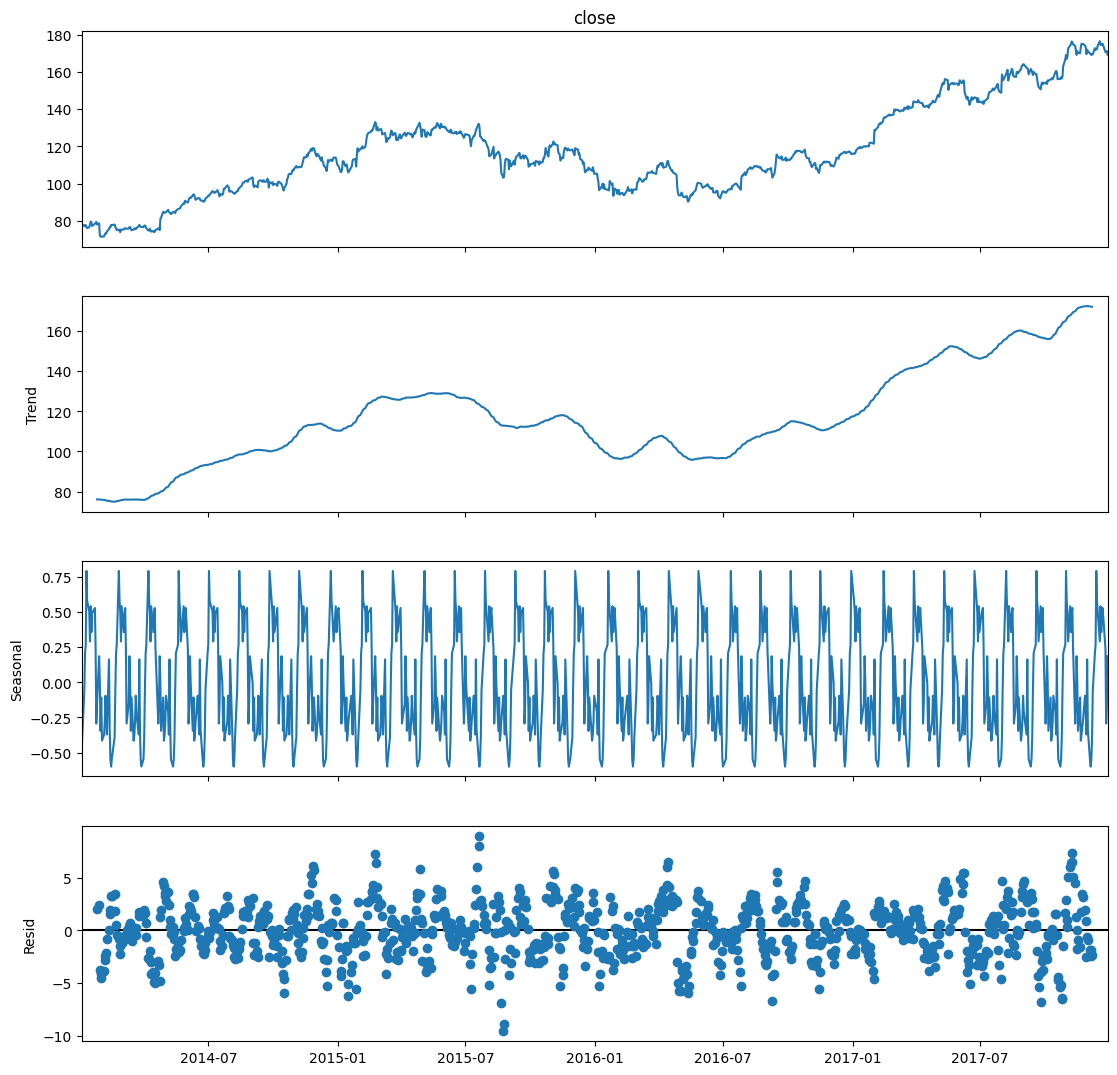

In [12]:
decompose = sm.tsa.seasonal_decompose(stock_df["close"], model="additive", period=30)
fig = decompose.plot()
fig.set_size_inches(12, 12)
plt.show();

SMOOTH LINE 

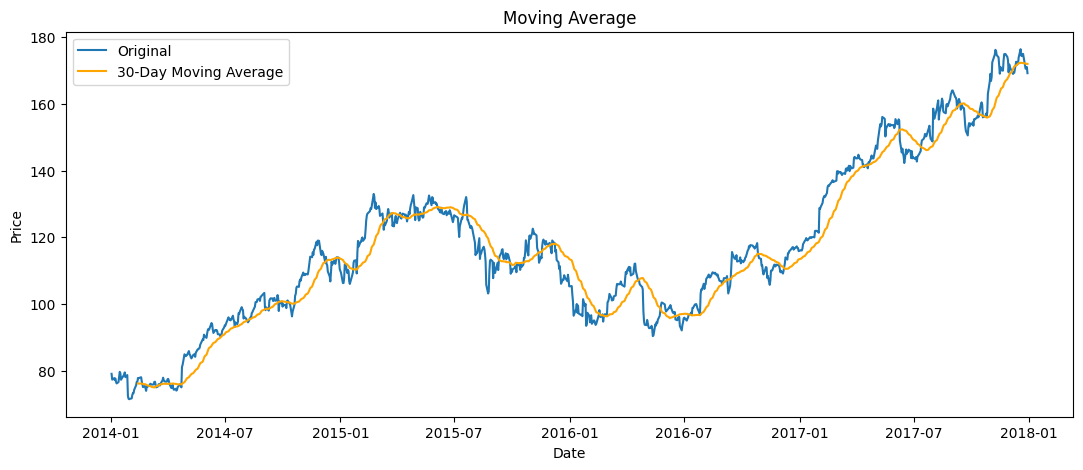

In [13]:
stock_df["MA_30"] = stock_df["close"].rolling(window=30).mean()
plt.figure(figsize=(13, 5))
plt.plot(stock_df["close"], label="Original")
plt.plot(stock_df["MA_30"], label="30-Day Moving Average", color="orange")
plt.title("Moving Average")
plt.xlabel("Date"); plt.ylabel("Price"); plt.legend()
plt.show();

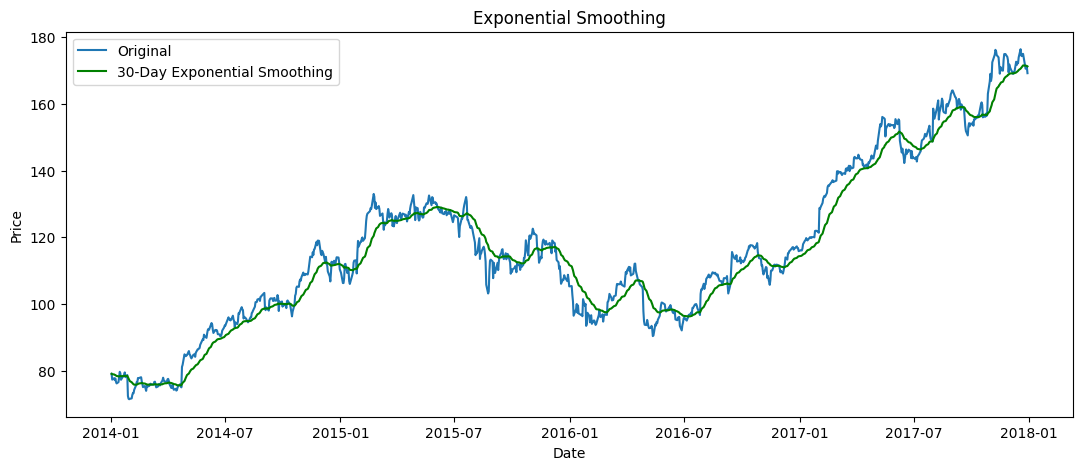

In [14]:
stock_df["ES_30"] = stock_df["close"].ewm(span=30, adjust=False).mean()
plt.figure(figsize=(13, 5))
plt.plot(stock_df["close"], label="Original")
plt.plot(stock_df["ES_30"], label="30-Day Exponential Smoothing", color="green")
plt.title("Exponential Smoothing")
plt.xlabel("Date"); plt.ylabel("Price"); plt.legend()
plt.show();

In [15]:
split_ratio =  (int(len(stock_df.sample(frac=1)) * 0.8))
train, test = stock_df.iloc[:split_ratio], stock_df.iloc[split_ratio:]
X_train, y_train = train.drop(columns=['close']),train['close']
X_test, y_test = test.drop(columns=['close']),test['close']
train.shape[0], test.shape[0]

(805, 202)

ARIMA FORECAST

In [16]:
arima_model = sm.tsa.ARIMA(train["close"], order=(5,1,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
pd.DataFrame({"ARIMA Forecast":arima_forecast, "Actual Close":test['close'].values})

c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No su

,ARIMA Forecast,Actual Close
805,138.988525,140.46
806,138.979085,140.69
807,138.979056,139.99
808,138.985041,141.46
809,138.986055,139.84
...,...,...
1002,138.985931,175.01
1003,138.985931,170.57
1004,138.985931,170.60
1005,138.985931,171.08


In [17]:
print("Model Evaluation")
arima_r2 = r2_score(test["close"], arima_forecast)
arima_mae = mean_absolute_error(test["close"], arima_forecast)
arima_mse = mean_squared_error(test["close"], arima_forecast)
arima_rmse = np.sqrt(arima_mse)

Model Evaluation


In [18]:
print("ARIMA Model Performance:")
print(f"R2: {round(arima_r2*100, 3)}%" if arima_r2 > 0 else "R2: Poor fit (Less than 0%)")
print("Mean Absolute Error:",round(arima_mae, 2))
print("Mean Squared Error:",round(arima_mse, 2))
print("Root of MSE:",round(arima_rmse, 2))

ARIMA Model Performance:
R2: Poor fit (Less than 0%)
Mean Absolute Error: 16.82
Mean Squared Error: 390.99
Root of MSE: 19.77


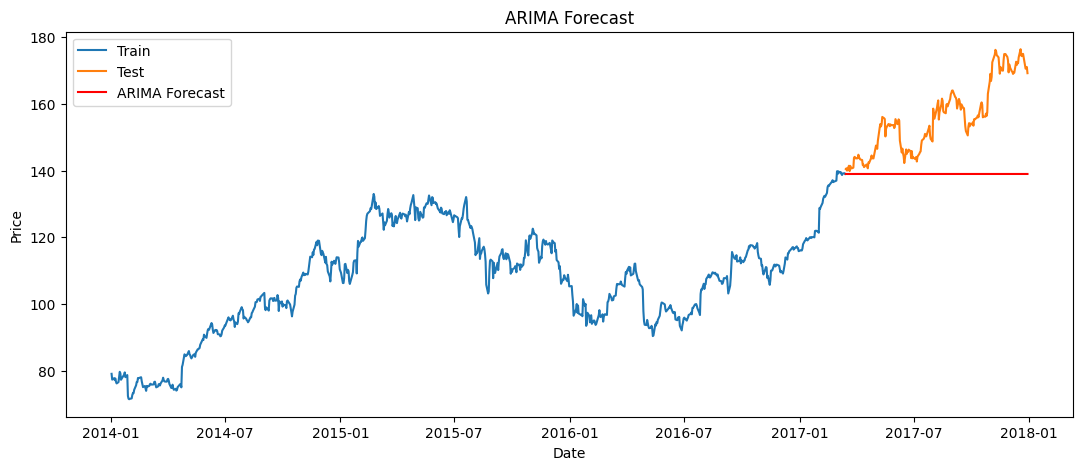

In [19]:
plt.figure(figsize=(13, 5))
plt.plot(train["close"], label="Train"); plt.plot(test["close"], label="Test")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="red")
plt.title("ARIMA Forecast"); plt.xlabel("Date"); plt.ylabel("Price"); plt.legend()
plt.show();

SARIMA FORECASTING

In [20]:
sarima_model = SARIMAX(train["close"], order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))
pd.DataFrame({"SARIMA Forecast":arima_forecast, "Actual Close":test['close'].values})

c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-

,SARIMA Forecast,Actual Close
805,138.988525,140.46
806,138.979085,140.69
807,138.979056,139.99
808,138.985041,141.46
809,138.986055,139.84
...,...,...
1002,138.985931,175.01
1003,138.985931,170.57
1004,138.985931,170.60
1005,138.985931,171.08


In [21]:
sarima_r2 = r2_score(test["close"], sarima_forecast)
sarima_mae = mean_absolute_error(test["close"], sarima_forecast)
sarima_mse = mean_squared_error(test["close"], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)

print("SARIMA Model Performance:")
print(f"R2: {round(sarima_r2*100, 3)}%" if sarima_r2 > 0 else "R2: Poor fit (Less than 0%)")
print("MAE:",round(sarima_mae, 2))
print("MSE:",round(sarima_mse, 2))
print("RMSE:",round(sarima_rmse, 2))


SARIMA Model Performance:
R2: Poor fit (Less than 0%)
MAE: 9.25
MSE: 131.06
RMSE: 11.45


c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


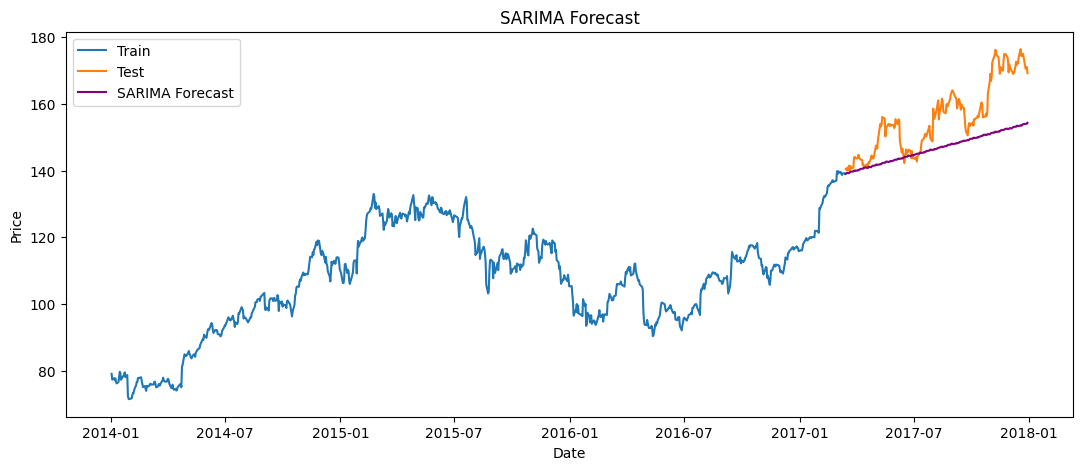

In [22]:
plt.figure(figsize=(13, 5))
sarima_forecast = sarima_fit.forecast(steps=len(test))
plt.plot(train["close"], label="Train"); plt.plot(test["close"], label="Test")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="purple")
plt.title("SARIMA Forecast"); plt.xlabel("Date"); plt.ylabel("Price"); plt.legend()
plt.show();

BOTH statmodels fails to forecast future stock level. In order to predict the market value or growth trend and patterns we need to bend with usual supervised algorithms to let model not forecast but tell future values !

TASK 3 (NEURAL NETWORK)

In [23]:
stock_market['date'] = pd.to_datetime(stock_market['date'])
stock_market.sort_values('date', inplace=True)
close_data = stock_market[['close']].values
stock_market

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_18504\4265952941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_market['date'] = pd.to_datetime(stock_market['date'])
C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_18504\4265952941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_market.sort_values('date', inplace=True)


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.07,25.82,25.060,25.36,8998943
330,NVDA,2014-01-02,15.92,15.98,15.720,15.86,6502296
329,NUE,2014-01-02,53.29,53.38,52.510,52.73,1611326
328,NTRS,2014-01-02,61.76,61.95,60.665,60.89,1011050
327,NTAP,2014-01-02,41.01,41.01,40.415,40.42,2427140
...,...,...,...,...,...,...,...
497128,EMR,2017-12-29,70.04,70.21,69.690,69.69,1848874
497127,EMN,2017-12-29,93.71,93.76,92.550,92.64,632351
497126,EL,2017-12-29,127.80,128.13,127.200,127.24,805149
497139,EVHC,2017-12-29,34.70,35.09,34.530,34.56,1471045


In [24]:
scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(close_data)
lookback = 60

In [25]:
X = []; y = []
for i in range(lookback, len(close_scaled)):
    X.append(close_scaled[i - lookback:i, 0])
    y.append(close_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [26]:
model = Sequential([LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)), Dropout(0.2), LSTM(64), Dropout(0.2), Dense(1)])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
stock_market = stock_market.sample(n=5000, random_state=42)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=50)

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss Curve"); plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.show();

In [ ]:
predicted = model.predict(X_test)
predicted_actual = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_actual, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend(); plt.show();

In [ ]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

TASK 2 NATURAL LANGUAGE PROCESSING (TEXT ANALYSIS)

In [ ]:
sentiment = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/3) Sentiment dataset.csv")
text_Df = sentiment.copy()
text_Df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


Downloading Apparatus Required

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Samuel
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Samuel
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Samuel
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

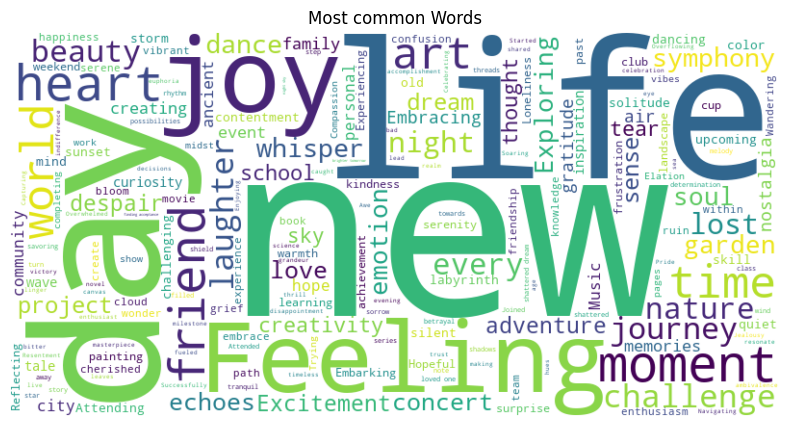

In [ ]:
text = " ".join(text_Df["Text"].astype(str))
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most common Words")
plt.show();

TOP 10 MOST UESD WORDS

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
word_freq = Counter(word for word in text.split() if word not in stop_words)
top_10_words = word_freq.most_common(10)
pd.DataFrame(top_10_words, columns=['Word', 'Frequency']).T

,0,1,2,3,4,5,6,7,8,9
Word,new,In,A,like,The,beauty,Feeling,Exploring,journey,symphony
Frequency,39,39,33,24,22,20,16,16,16,16


In [ ]:
text_Df["Cleaned_Text"] = text_Df["Text"].astype(str).str.lower()
text_Df["Cleaned_Text"] = text_Df["Cleaned_Text"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_Df.head(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout 💪 ...


TOKENIZER

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokens_list = []

for text in text_Df["Cleaned_Text"]:
    tokens = tokenizer.tokenize(str(text))
    tokens_list.append(tokens)

text_Df["Tokens"] = tokens_list
text_Df.head(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text,Tokens
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...,"[enjoying, a, beautiful, day, at, the, park]"
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...,"[traffic, was, terrible, this, morning]"
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout 💪 ...,"[just, finished, an, amazing, workout]"


In [ ]:
stop_words = set(stopwords.words('english'))
text_Df["Tokens_NoStop"] = text_Df["Tokens"].apply(lambda x: [word for word in x if word not in stop_words])
text_Df.head(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text,Tokens,Tokens_NoStop
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout 💪 ...,"[just, finished, an, amazing, workout]","[finished, amazing, workout]"


In [ ]:
stemmer = PorterStemmer()
text_Df["Tokens_Stemmed"] = text_Df["Tokens_NoStop"].apply(lambda x: [stemmer.stem(word) for word in x])
text_Df["Final_Text"] = text_Df["Tokens_Stemmed"].apply(lambda x: " ".join(x))

text_Df.head(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text,Tokens,Tokens_NoStop,Tokens_Stemmed,Final_Text
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...,"[enjoying, a, beautiful, day, at, the, park]","[enjoying, beautiful, day, park]","[enjoy, beauti, day, park]",enjoy beauti day park
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...,"[traffic, was, terrible, this, morning]","[traffic, terrible, morning]","[traffic, terribl, morn]",traffic terribl morn
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout 💪 ...,"[just, finished, an, amazing, workout]","[finished, amazing, workout]","[finish, amaz, workout]",finish amaz workout


In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens_list = []

for tokens in text_Df["Tokens_NoStop"]:
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_tokens_list.append(lemmatized)

text_Df["Tokens_Lemmatized"] = lemmatized_tokens_list
sentiment = text_Df.copy()
text_Df["Final_Text"] = text_Df["Tokens_Lemmatized"].apply(lambda x: " ".join(x))
text_Df[["Text", "Final_Text"]].head(3)

,Text,Final_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout


MOST USED WORDS

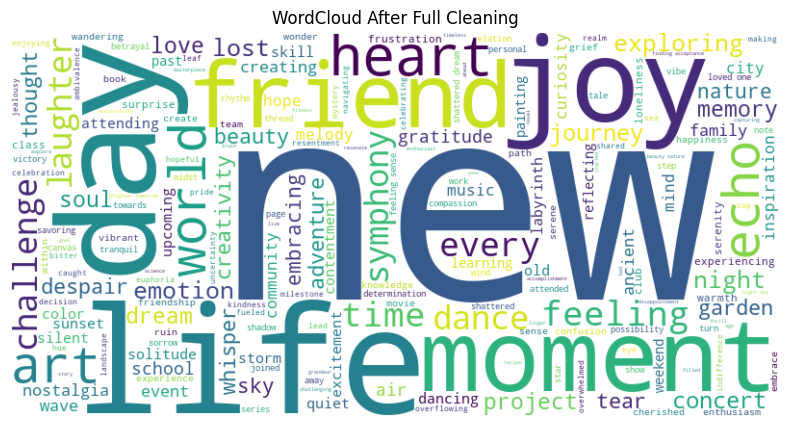

In [ ]:
final_text = " ".join(text_Df["Final_Text"])
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(final_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off"); plt.title("WordCloud After Full Cleaning")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
X,y = vectorizer.fit_transform(text_Df["Cleaned_Text"]), text_Df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape[0],X_test.shape[0]

(549, 183)

LOGISTIC REGRESSION

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_preds = logit.predict(X_test)
pd.DataFrame({"Actual Sentiment":y_test,"Logit Prediction":logit_preds})

,Actual Sentiment,Logit Prediction
604,Curiosity,Joy
33,Positive,Positive
300,Fearful,Joy
457,Heartbreak,Joy
634,Joy,Joy
...,...,...
110,Euphoria,Joy
82,Love,Positive
51,Positive,Positive
477,Joy,Positive


In [ ]:
print(f"  Accuracy: {round(accuracy_score(y_test, logit_preds)*100, 3)}%")
print(f"  Precision: {round(precision_score(y_test, logit_preds, average='weighted'), 3)}")
print(f"  Recall: {round(recall_score(y_test, logit_preds, average='weighted'), 3)}")
print(f"  F1 Score: {round(f1_score(y_test, logit_preds, average='weighted'), 3)}")

  Accuracy: 11.475%
  Precision: 0.028
  Recall: 0.115
  F1 Score: 0.04


c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NAIVE BAYES

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
pd.DataFrame({"Actual Sentiment":y_test,"Bayes Prediction":nb_preds})

,Actual Sentiment,Bayes Prediction
604,Curiosity,Joy
33,Positive,Positive
300,Fearful,Joy
457,Heartbreak,Joy
634,Joy,Joy
...,...,...
110,Euphoria,Joy
82,Love,Positive
51,Positive,Positive
477,Joy,Joy


In [ ]:
print(f"  Accuracy: {round(accuracy_score(y_test, nb_preds)*100, 3)}%")
print(f"  Precision: {round(precision_score(y_test, nb_preds, average='weighted'), 3)}")
print(f"  Recall: {round(recall_score(y_test, nb_preds, average='weighted'), 3)}")
print(f"  F1 Score: {round(f1_score(y_test, nb_preds, average='weighted'), 3)}")

  Accuracy: 12.022%
  Precision: 0.032
  Recall: 0.12
  F1 Score: 0.042


c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LABEL ENCODE TEXTS INTO COLUMNS

In [ ]:
sentiment["Tokens_Lemma"] = sentiment["Tokens_Lemmatized"].apply(lambda x: x if isinstance(x, list) else [])
sentiment["Word_1"] = sentiment["Tokens_Lemma"].apply(lambda x: x[0] if len(x) > 0 else "")
sentiment["Word_2"] = sentiment["Tokens_Lemma"].apply(lambda x: x[1] if len(x) > 1 else "")
sentiment["Word_3"] = sentiment["Tokens_Lemma"].apply(lambda x: x[2] if len(x) > 2 else "")
sentiment["Word_4"] = sentiment["Tokens_Lemma"].apply(lambda x: x[3] if len(x) > 3 else "")
sentiment["Word_5"] = sentiment["Tokens_Lemma"].apply(lambda x: x[4] if len(x) > 4 else "")
sentiment.head(3)


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,...,Tokens_NoStop,Tokens_Stemmed,Final_Text,Tokens_Lemmatized,Tokens_Lemma,Word_1,Word_2,Word_3,Word_4,Word_5
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,...,"[enjoying, beautiful, day, park]","[enjoy, beauti, day, park]",enjoy beauti day park,"[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]",enjoying,beautiful,day,park,
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,...,"[traffic, terrible, morning]","[traffic, terribl, morn]",traffic terribl morn,"[traffic, terrible, morning]","[traffic, terrible, morning]",traffic,terrible,morning,,
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,...,"[finished, amazing, workout]","[finish, amaz, workout]",finish amaz workout,"[finished, amazing, workout]","[finished, amazing, workout]",finished,amazing,workout,,


In [ ]:
sentiment[["Word_1", "Word_2", "Word_3", "Word_4", "Word_5"]].sample(5)

,Word_1,Word_2,Word_3,Word_4,Word_5
85,admiring,dedication,volunteer,local,charity
431,painful,echo,love,cherished,lost
676,crafting,intricate,friendship,bracelet,whole
159,enthusiasm,diy,home,improvement,project
343,overjoyed,warmth,cozy,fireplace,winter


In [ ]:
encoder = LabelEncoder()
for col in ["Word_1", "Word_2", "Word_3", "Word_4", "Word_5","Sentiment"]:
    sentiment[col] = encoder.fit_transform(sentiment[col].astype(str))

ALL TYPE OF SENTIMENTS

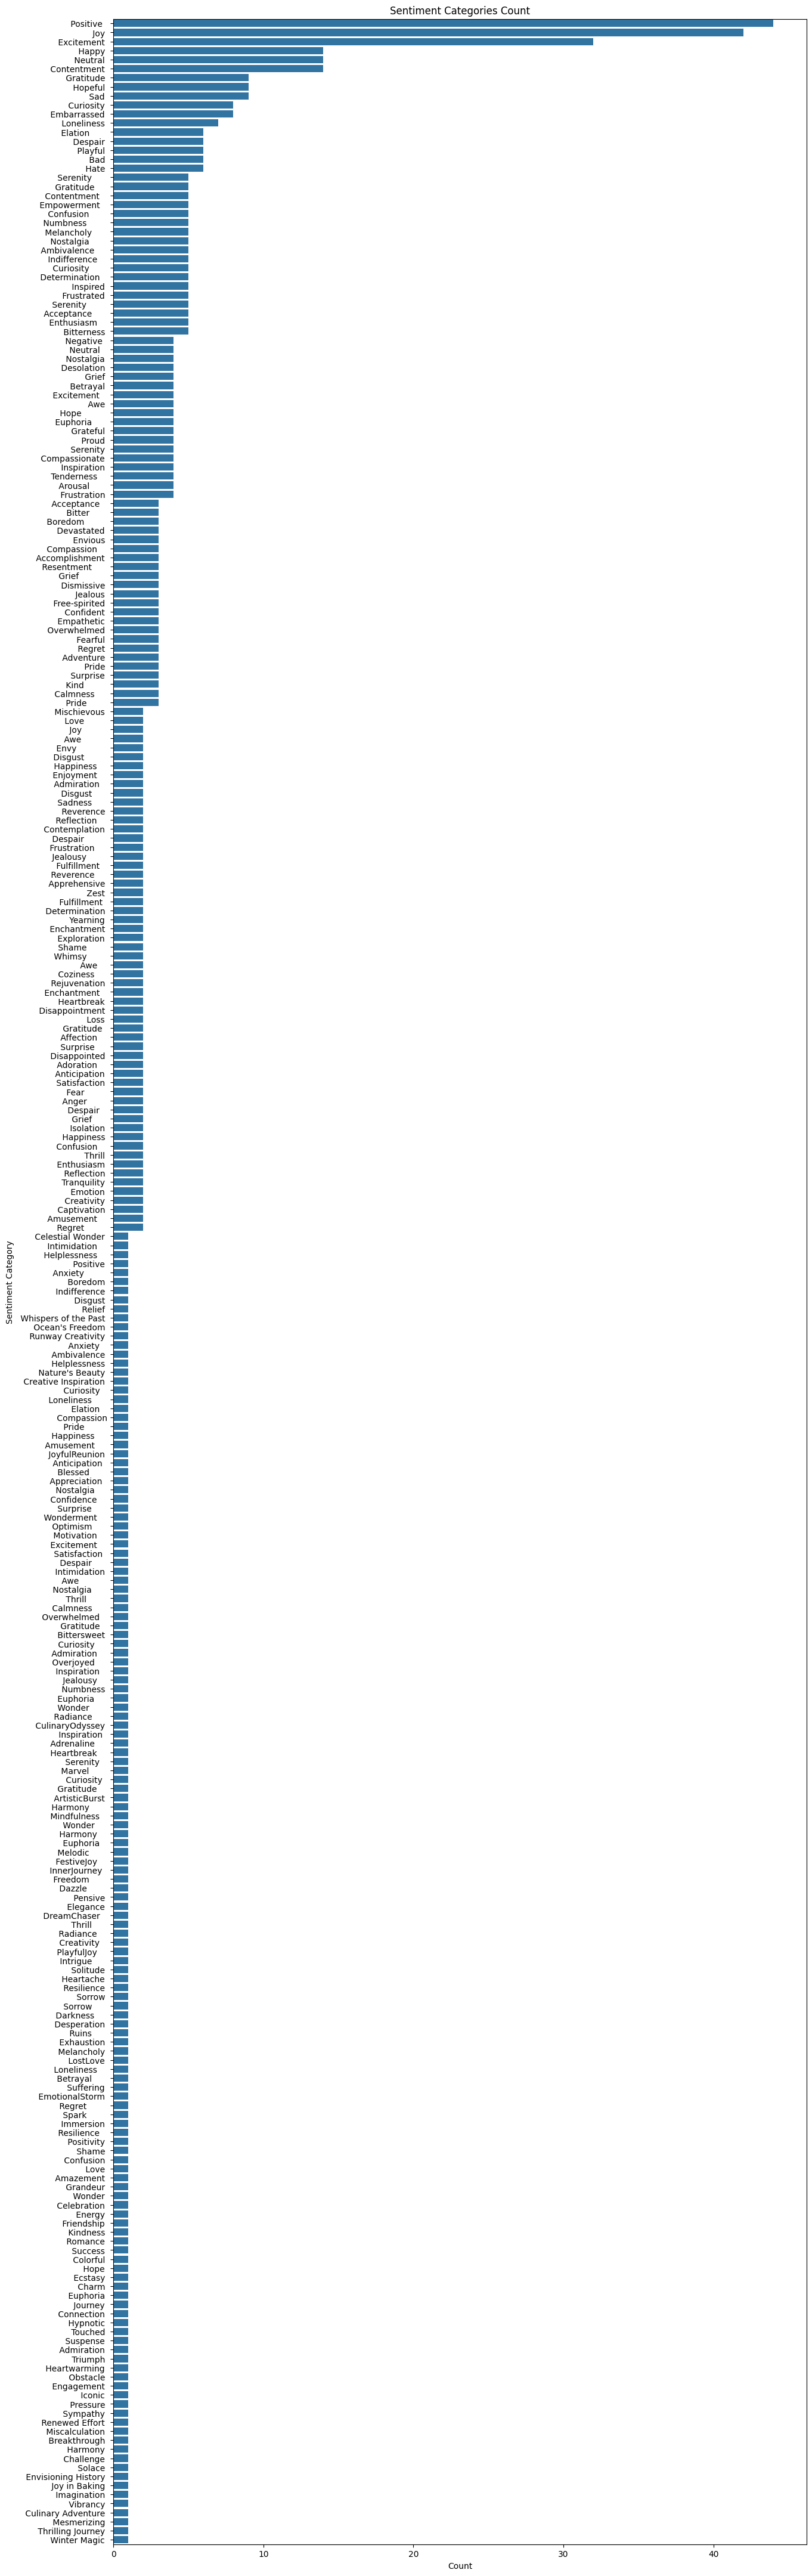

In [ ]:
plt.figure(figsize=(15,55))
sns.countplot(data=sentiment, y="Sentiment", order=sentiment["Sentiment"].value_counts().index)
plt.title("Sentiment Categories Count")
plt.xlabel("Count"); plt.ylabel("Sentiment Category")
plt.show();

COMPRESSING SENTIMENTS INTO EITHER POSTIVE OR NEGATIVE 

In [ ]:
unique_sentiments = sentiment["Sentiment"].unique()
positive = []; negative = []

for emotion in unique_sentiments:
    blob = TextBlob(emotion)
    polarity = blob.sentiment.polarity  
    if polarity > 0:
        positive.append(emotion)
    elif polarity < 0:
        negative.append(emotion)
    else:
        pass
    
def simplify_sentiment(sentiment):
    if sentiment in positive:
        return "Positive"
    elif sentiment in negative:
        return "Negative"
    else:
        return "Neutral"

sentiment["Emotion"] = sentiment["Sentiment"].apply(simplify_sentiment)
sentiment[["Emotion","Sentiment","Word_1", "Word_2", "Word_3", "Word_4", "Word_5"]].sample(5)

,Emotion,Sentiment,Word_1,Word_2,Word_3,Word_4,Word_5
38,Positive,Positive,314,280,114,365,0
690,Negative,Sad,129,255,377,302,379
300,Negative,Fearful,125,438,306,302,167
93,Negative,Bitter,31,155,101,400,113
266,Neutral,Hopeful,100,215,107,193,383


In [ ]:
X = sentiment[["Word_1", "Word_2", "Word_3", "Word_4", "Word_5"]]
y = sentiment["Emotion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

MODEL BUILIDNG

In [ ]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
logit_preds = logit.predict(X_test)
pd.DataFrame({"Actual Sentiment":y_test,"Logit Prediction":logit_preds})

,Actual Sentiment,Logit Prediction
604,Neutral,Neutral
33,Positive,Neutral
300,Negative,Neutral
457,Neutral,Neutral
634,Positive,Neutral
...,...,...
110,Neutral,Neutral
82,Positive,Neutral
51,Positive,Neutral
477,Positive,Neutral


In [ ]:
print(f"  Accuracy: {round(accuracy_score(y_test, logit_preds)*100, 3)}%")
print(f"  Precision: {round(precision_score(y_test, logit_preds, average='weighted'), 3)}")
print(f"  Recall: {round(recall_score(y_test, logit_preds, average='weighted'), 3)}")
print(f"  F1 Score: {round(f1_score(y_test, logit_preds, average='weighted'), 3)}")

  Accuracy: 73.77%
  Precision: 0.544
  Recall: 0.738
  F1 Score: 0.626


c:\Users\Samuel Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LOGIT MODEL PREDICTS THE SENTIMENT WITH 70% ACCURACY WITH TEST SET !